#### Project Description:
This project analyzes Bitcoin price data from 2010 to 2024, focusing on daily closing prices, volumes, and price ranges. Through visualizations like line plots, histograms, heatmaps etc..., the goal is to identify trends, relationships, and insights, including price movements, trading volumes, and correlations. Statistical methods like correlation matrices and groupby operations are used for deeper analysis.

## Import Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn import regplot
plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 200)
#from ydata_profiling import ProfileReport

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

Project relized by
- **Aimad SADOUK**
- Friday, December 13, 2024

### Resume of Exploratory Data Analysis (EDA) 


#### Structural Analysis
- **Target Variable**:  Analyzing Close Price values.
- **Rows and Columns**: 3724 rows, 07 columns 
- **Variable Types**: Quantitative: 90%, The rest 10%
- **Missing Value Analysis**:  No,Missing Values

## Data Understanding/ Data Pre-processing
#### Understanding, Cleaning & Manipulating Data
- Dataframe shape
 - head & tail
 - dtypes
 - describe 

In [116]:
# Reading the Data & Showing the rows headers
df= pd.read_csv('Bitcoin_Historical_Data.csv')
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [117]:
df.shape # Shows the total number of rows and columns

(3724, 7)

In [118]:
df.dtypes.value_counts(normalize=True)*100  # distribution of data types

float64    71.428571
object     14.285714
int64      14.285714
Name: proportion, dtype: float64

In [119]:
# Convert Date from object to datetime for time-based analysis
df['Date'] = pd.to_datetime(df['Date'])

In [120]:
# Creating New Columns
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculating a new column Dollars
df['Dollars'] = 0.5 * (df['High'] + df['Low']) * df['Volume'] 

In [121]:
# Top 5 highest closing prices
df.groupby('Date')['Close'].max().sort_values(ascending= False)[:5]

Date
2024-11-22 00:00:00+00:00    98997.664062
2024-11-21 00:00:00+00:00    98504.726562
2024-11-24 00:00:00+00:00    98013.820312
2024-11-23 00:00:00+00:00    97777.281250
2024-11-20 00:00:00+00:00    94339.492188
Name: Close, dtype: float64

In [122]:
# Top 5 lowest closing prices
df.groupby('Date')['Close'].min().sort_values().nsmallest(5) 

Date
2015-01-14 00:00:00+00:00    178.102997
2015-01-17 00:00:00+00:00    199.259995
2015-01-16 00:00:00+00:00    208.097000
2015-01-15 00:00:00+00:00    209.843994
2015-01-18 00:00:00+00:00    210.339005
Name: Close, dtype: float64

In [123]:
df.describe() #  Summary Statistics for numeric columns

,Adj Close,Close,High,Low,Open,Volume,Month,Year,Dollars
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3.724000e+03,3724.000000,3724.000000,3.724000e+03
mean,18848.682606,18848.682606,19251.921859,18381.434184,18825.293605,1.814878e+10,6.591837,2019.301557,6.104612e+14
std,20873.547415,20873.547415,21309.793415,20365.354458,20843.083527,1.975859e+10,3.453991,2.954410,1.047990e+15
min,178.102997,178.102997,211.731003,171.509995,176.897003,5.914570e+06,1.000000,2014.000000,2.307853e+09
25%,1198.755005,1198.755005,1217.054962,1178.120026,1192.667511,3.519457e+08,4.000000,2017.000000,3.933484e+11
50%,9284.764160,9284.764160,9440.763184,9134.778809,9284.070801,1.442858e+10,7.000000,2019.000000,1.834315e+14
75%,30182.014648,30182.014648,30605.878418,29580.905762,30153.408691,2.919828e+10,10.000000,2022.000000,7.715237e+14
max,98997.664062,98997.664062,99655.500000,97232.890625,99006.742188,3.509679e+11,12.000000,2024.000000,1.628941e+16


In [124]:
df.info() # Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       3724 non-null   datetime64[ns, UTC]
 1   Adj Close  3724 non-null   float64            
 2   Close      3724 non-null   float64            
 3   High       3724 non-null   float64            
 4   Low        3724 non-null   float64            
 5   Open       3724 non-null   float64            
 6   Volume     3724 non-null   int64              
 7   Month      3724 non-null   int32              
 8   Year       3724 non-null   int32              
 9   Dollars    3724 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int32(2), int64(1)
memory usage: 262.0 KB


In [125]:
df.head(5) #Checking the header rows

,Date,Adj Close,Close,High,Low,Open,Volume,Month,Year,Dollars
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,9,2014,9.692403e+09
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,9,2014,1.499957e+10
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,9,2014,1.540236e+10
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,9,2014,1.498835e+10
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,9,2014,1.070656e+10


In [126]:
df.tail(5) #chicking The Down rows

,Date,Adj Close,Close,High,Low,Open,Volume,Month,Year,Dollars
3719,2024-11-22 00:00:00+00:00,98997.664062,98997.664062,99655.500000,97222.664062,98496.429688,78473580551,11,2024,7.724867e+15
3720,2024-11-23 00:00:00+00:00,97777.281250,97777.281250,99014.679688,97232.890625,99006.742188,44414644677,11,2024,4.358133e+15
3721,2024-11-24 00:00:00+00:00,98013.820312,98013.820312,98647.179688,95788.078125,97778.093750,51712020623,11,2024,5.027320e+15
3722,2024-11-25 00:00:00+00:00,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490,11,2024,7.750234e+15
3723,2024-11-26 00:00:00+00:00,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855,11,2024,8.513175e+15


#### Asking a questions about the data 
- 1. Which year showed the highest volatility in Bitcoin prices?
- 2. What is the distribution of Bitcoin’s closing prices, and how frequently do certain price ranges occur?
- 3. What is the trend of Bitcoin's closing price over time?
- 4. What is the variation in Bitcoin's daily price range over time?
- 5. Is there a trend in Bitcoin's closing price over the years?
- 6. How has the trading volume of Bitcoin changed over time?

### Feature Understanding
> Plotting Feature Distributions
- Violinplot
- regplot
- Lineplot 
- histplot
- Scatterplot

#### 1.Which year showed the highest volatility in Bitcoin prices?

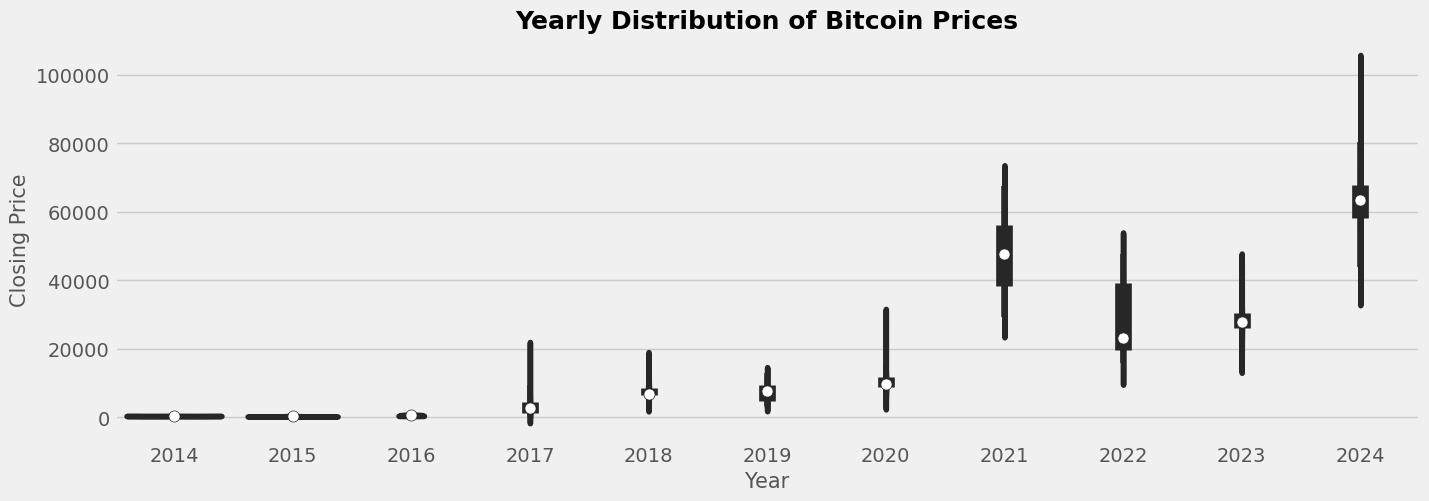

In [127]:
# 1.Which year showed the highest volatility in Bitcoin prices?
plt.figure(figsize=(15, 5))
ax = sns.violinplot(x='Year', y='Close', data=df, color='Indigo')
ax.set_title('Yearly Distribution of Bitcoin Prices',
             fontsize=18, fontweight='bold')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Closing Price', fontsize=15)
plt.show()

#### 2.What is the distribution of Bitcoin’s closing prices, and how frequently do certain price ranges occur?

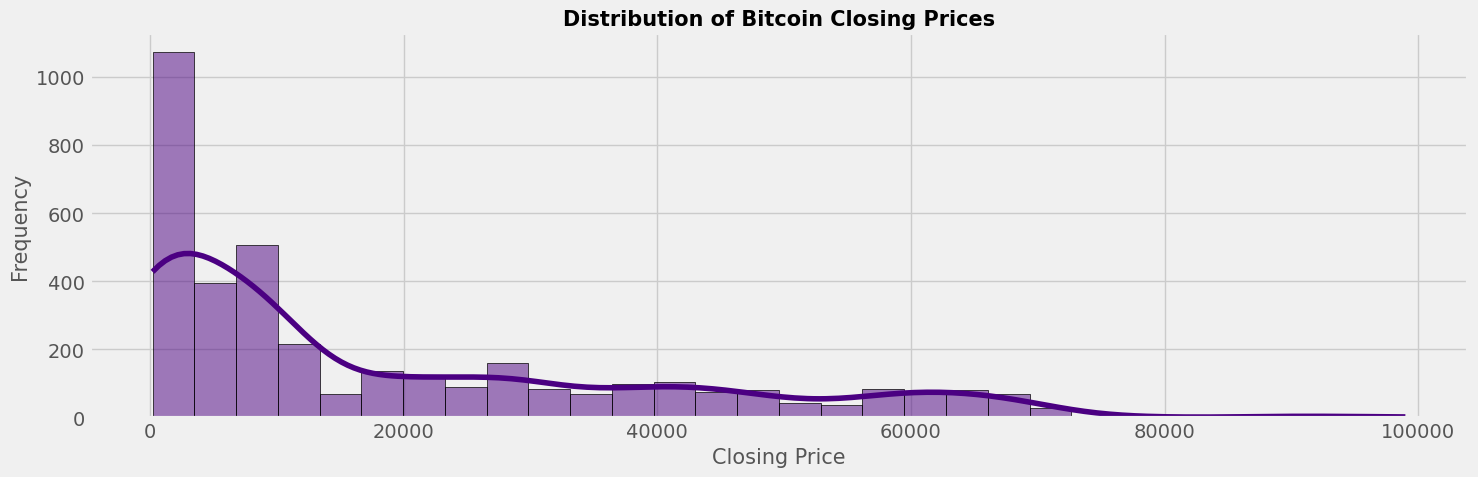

In [128]:
# 2.What is the distribution of Bitcoin’s closing prices,
# and how frequently do certain price ranges occur?
plt.figure(figsize=(15, 5))
ax = sns.histplot(df['Close'],bins=30, kde=True,
            color='Indigo', edgecolor='black')
ax.set_title('Distribution of Bitcoin Closing Prices',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Closing Price', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

plt.tight_layout()
plt.show()

#### 3.What is the trend of Bitcoin's closing price over time?

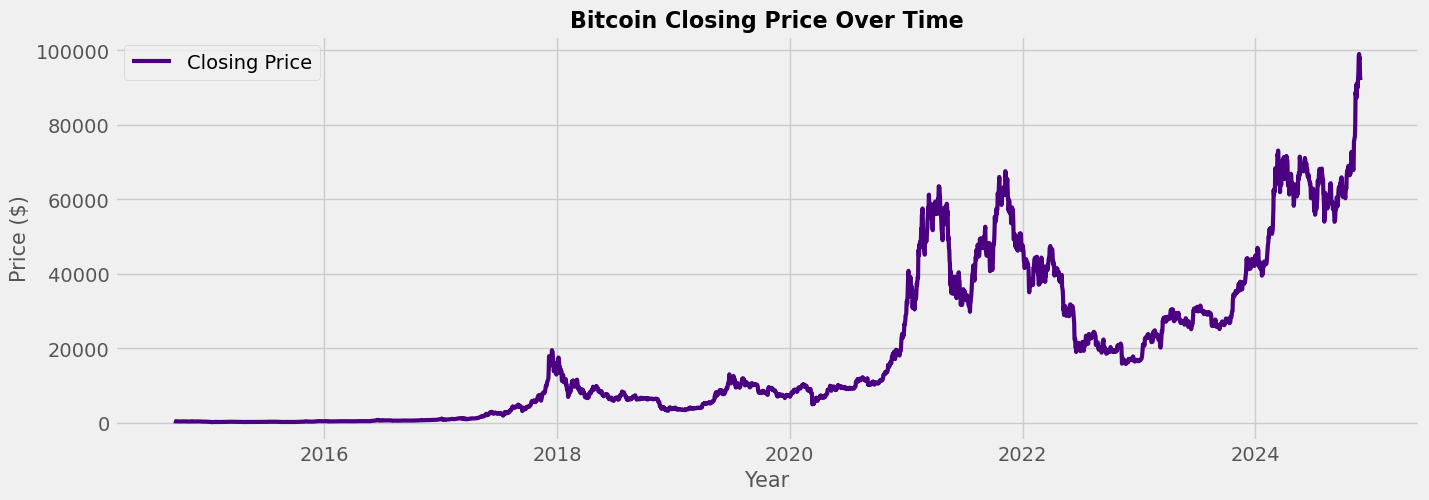

In [129]:
# 3.What is the trend of Bitcoin's closing price over time?
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='Date', y='Close', data=df,
                  lw=3, label='Closing Price', color='Indigo')
ax.set_title('Bitcoin Closing Price Over Time', fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Price ($)', fontsize=15)
plt.legend()
plt.show()

#### 4.What is the variation in Bitcoin's daily price range over time?

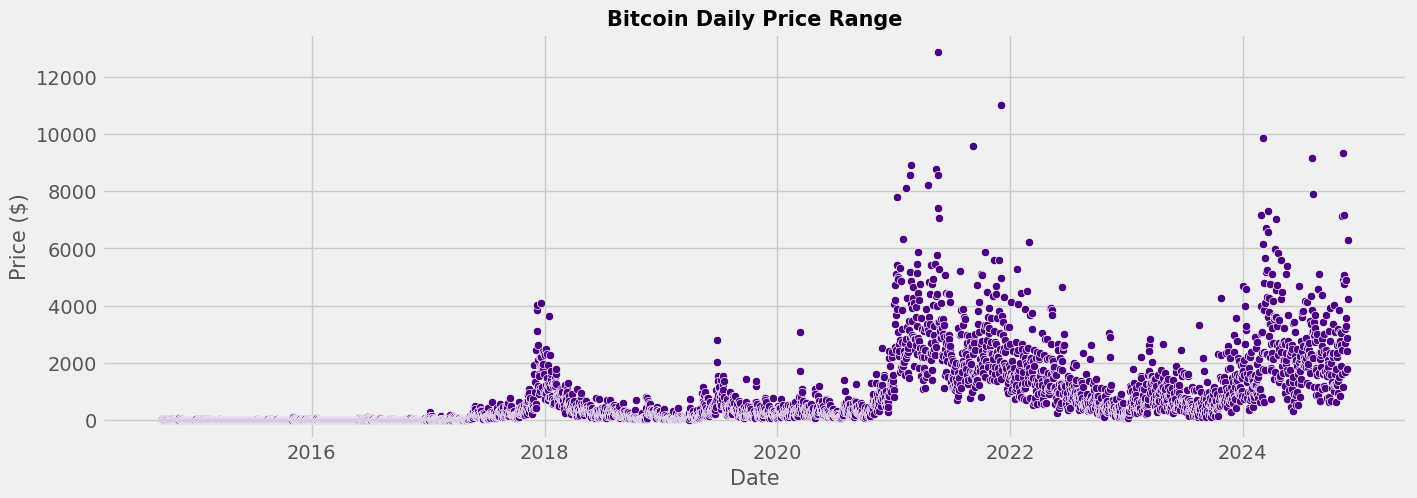

In [130]:
df['Price Range'] = df['High'] - df['Low']

# 4. What is the variation in Bitcoin's daily price range over time?
plt.figure(figsize=(15, 5))
ax = sns.scatterplot(x='Date', y=df['Price Range'], data=df,
            lw=1, color='Indigo')
ax.set_title('Bitcoin Daily Price Range',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Price ($)', fontsize=15)
plt.show()

#### 5.Is there a trend in Bitcoin's closing price over the years?

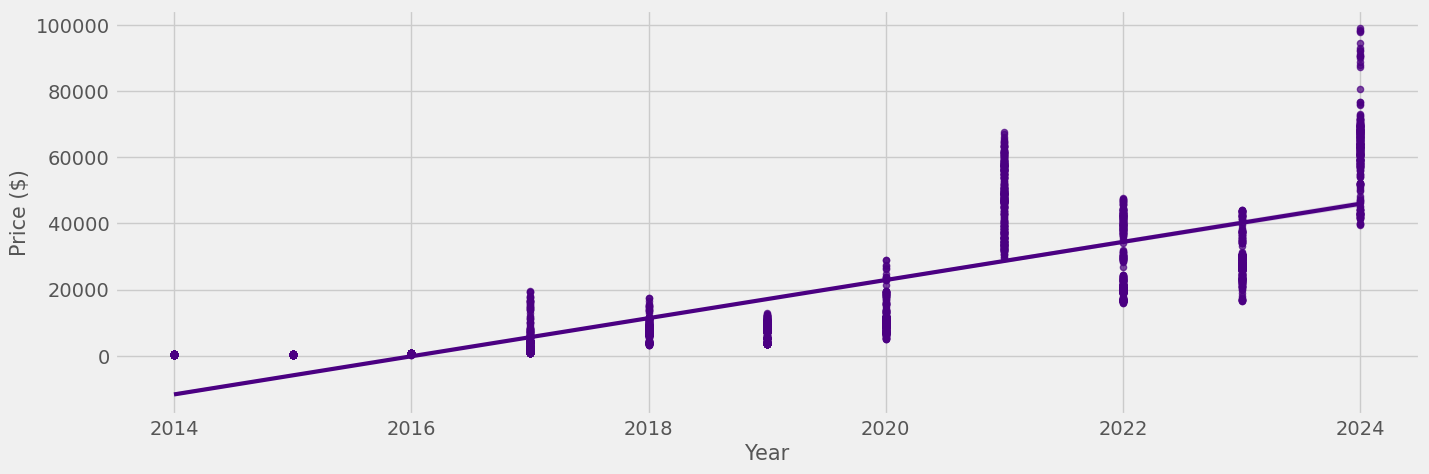

In [131]:
# 5.Is there a trend in Bitcoin's closing price over the years?
plt.figure(figsize=(15, 5))
ax = sns.regplot( data=df, x='Year', y='Close',color='Indigo', 
                line_kws={'linewidth': 3},scatter_kws={'s': 20, 'alpha': 0.7})
ax.set_title('')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Price ($)', fontsize=15)
plt.show()

#### 6.How has the trading volume of Bitcoin changed over time?

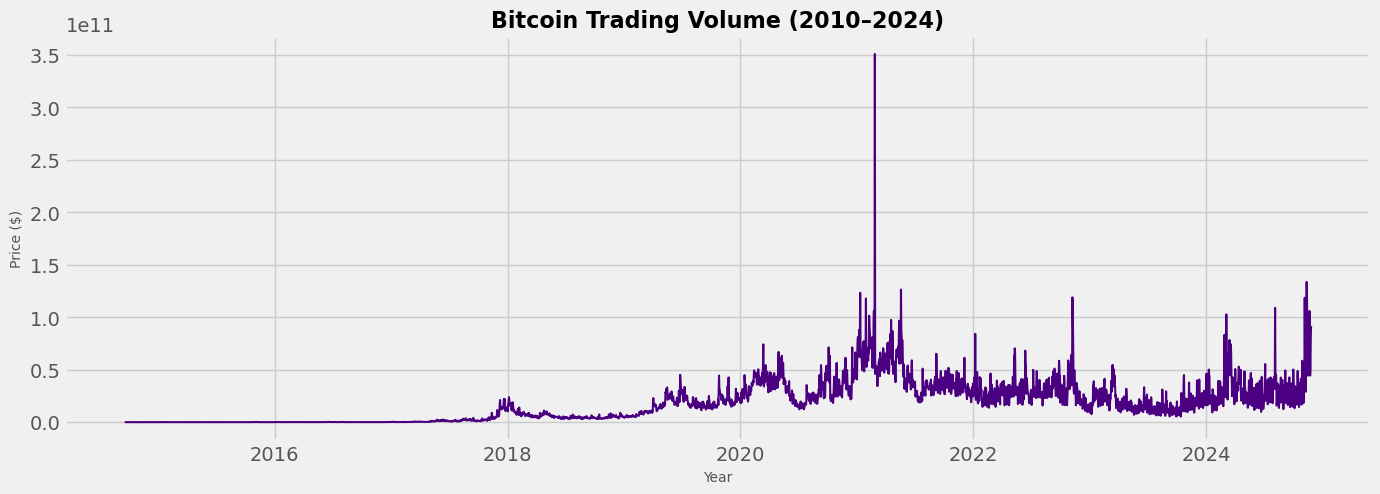

In [132]:
# 6.How has the trading volume of Bitcoin changed over time?
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='Date', y='Volume', data=df,
                  linewidth=1.5, color='Indigo')
ax.set_title('Bitcoin Trading Volume (2010–2024)',
             fontsize=16, fontweight='bold')  
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Price ($)', fontsize=10)
plt.show()

## Feature Relationships
- Heatmap correlation
- Scatter plot
- Pairplot 
- Groupby comparaisons 

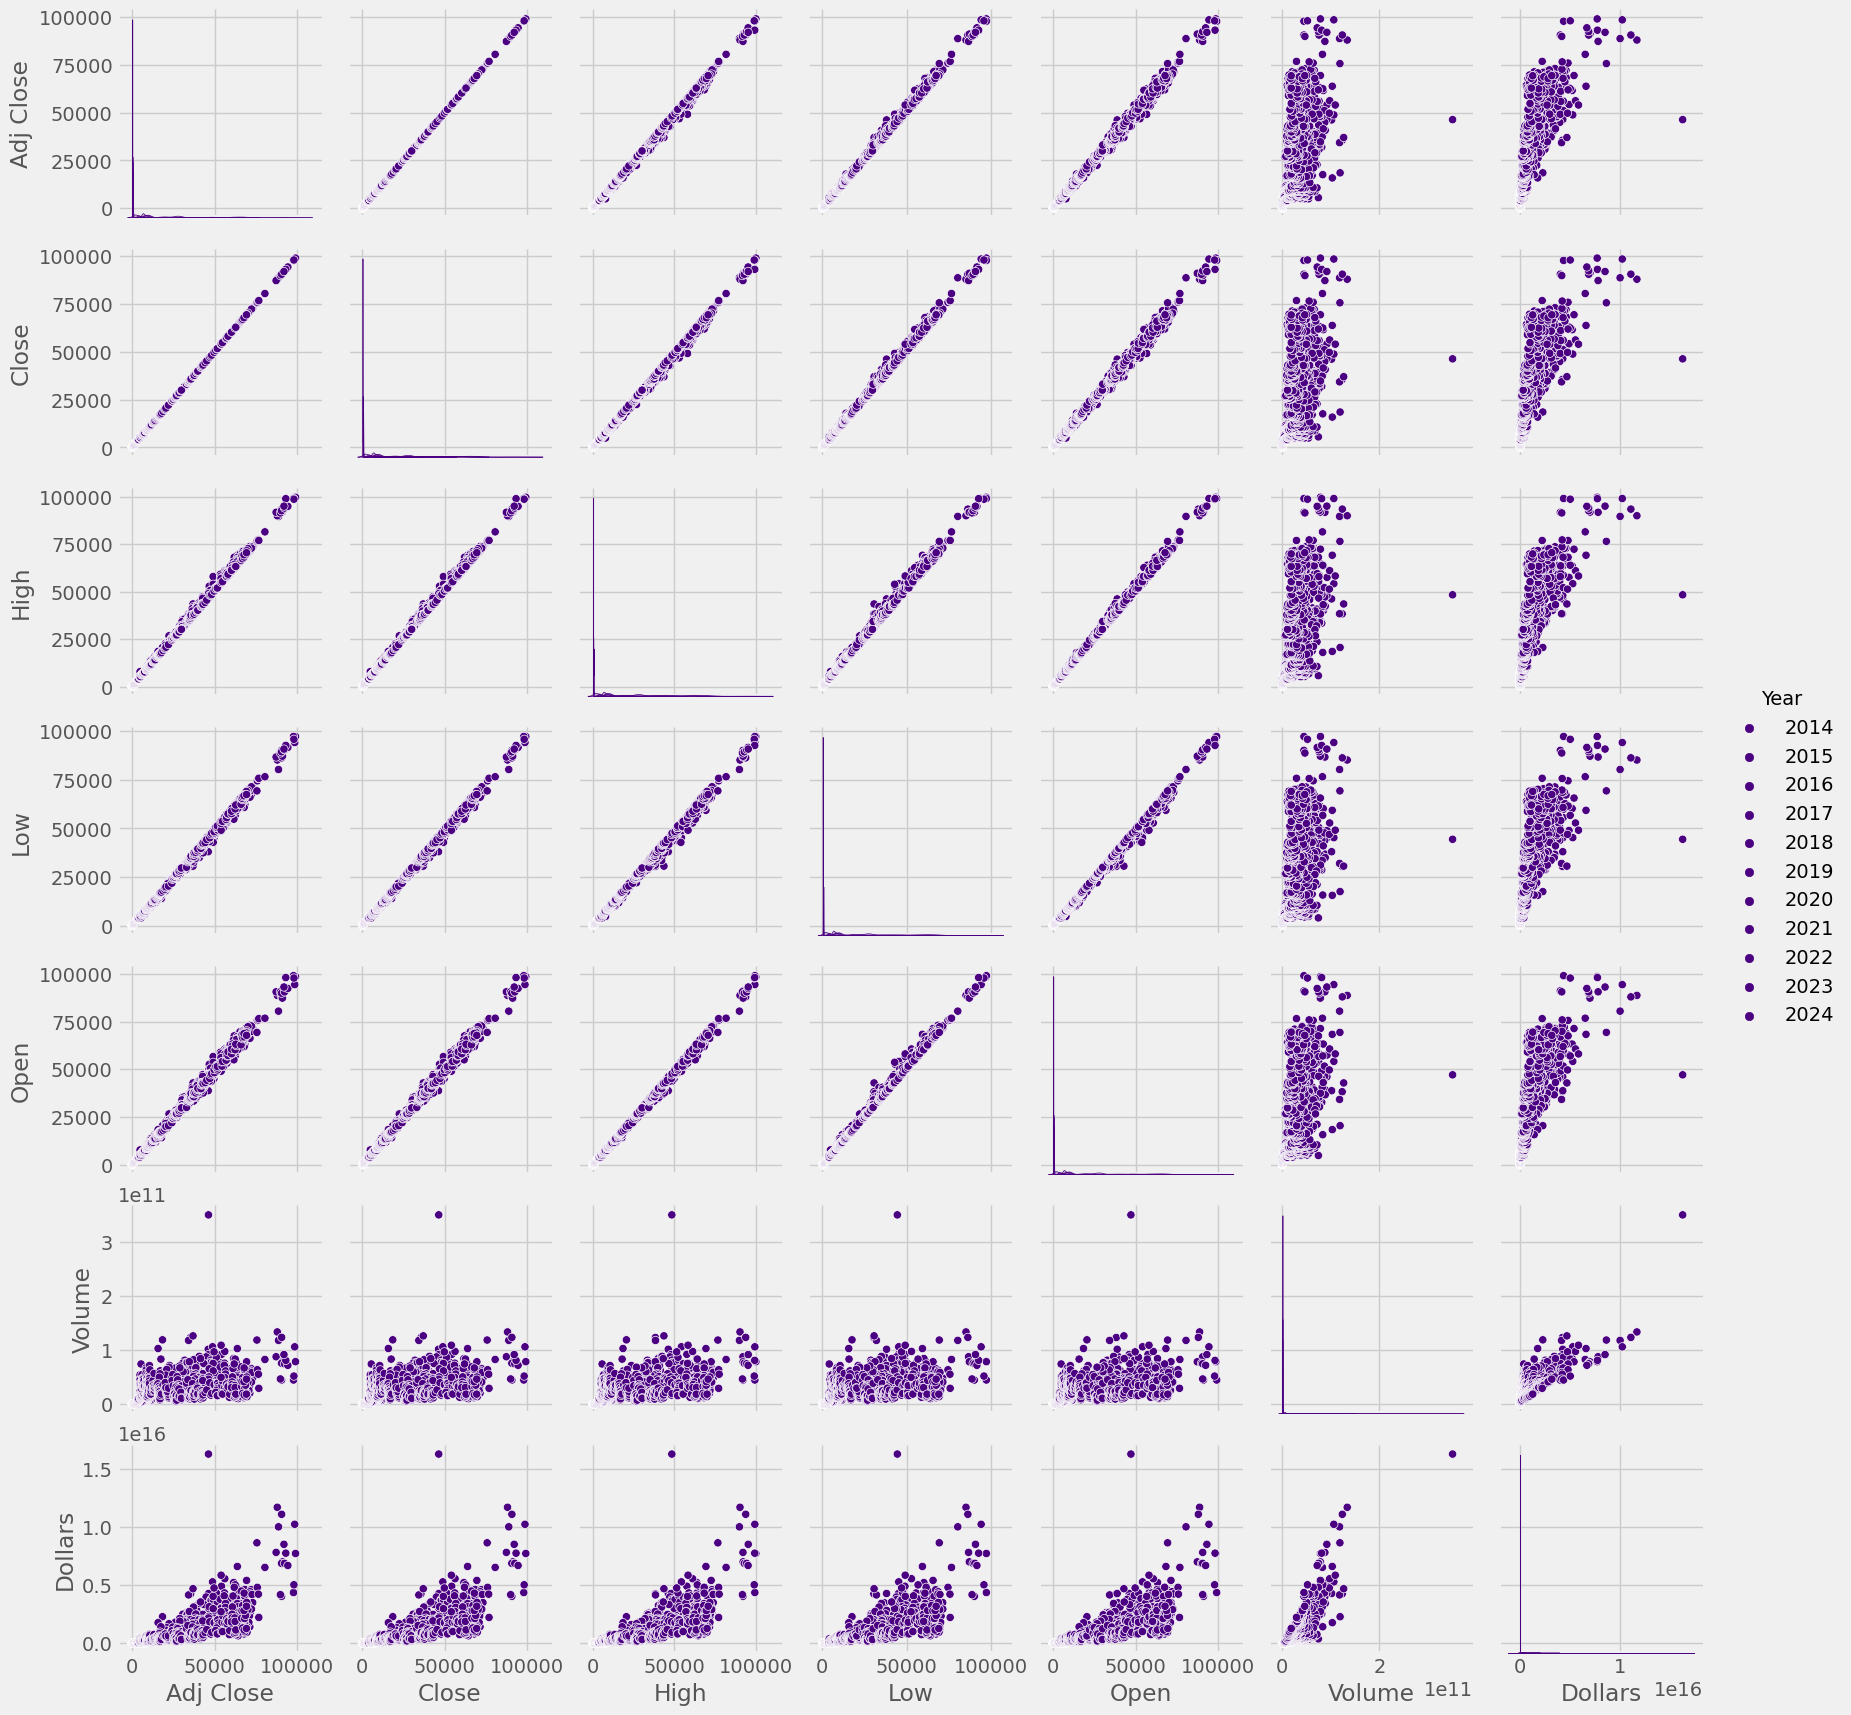

In [133]:
# Pairwise Relationships Between Bitcoin
sns.pairplot(  df,
         vars=['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Dollars'], 
         palette={year: 'indigo' for year in df['Year'].unique()},
         hue='Year')
plt.show()

In [134]:
# Correlation matrix of our Data
df_corr = df[['Adj Close', 'Close', 'High',
              'Low', 'Open', 'Volume']].dropna().corr()
df_corr

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523
Close,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523
High,0.999599,0.999599,1.000000,0.999183,0.999551,0.661160
Low,0.999486,0.999486,0.999183,1.000000,0.999324,0.645355
Open,0.999025,0.999025,0.999551,0.999324,1.000000,0.654951
Volume,0.654523,0.654523,0.661160,0.645355,0.654951,1.000000


#### The price-related columns (Adj Close, Close, High, Low, Open) are highly correlated, indicating they follow similar patterns. Volume shows a moderate correlation with the price data, suggesting some relationship between trading volume and price changes, but not as strong as the internal price correlations.

In [135]:
# Heatmap/ Plotting the correlation matrix of Our Data
abs(df_corr.Close)>= 1 # Loocking for the columns are a stong relationship to Close 
df_corr = df.corr()
df_corr.style.background_gradient(cmap='coolwarm')

,Date,Adj Close,Close,High,Low,Open,Volume,Month,Year,Dollars,Price Range
Date,1.000000,0.817026,0.817026,0.815427,0.819309,0.817031,0.632858,0.011847,0.995200,0.558248,0.546227
Adj Close,0.817026,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523,-0.013716,0.815350,0.811738,0.748006
Close,0.817026,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523,-0.013716,0.815350,0.811738,0.748006
High,0.815427,0.999599,0.999599,1.000000,0.999183,0.999551,0.661160,-0.015189,0.813900,0.816993,0.759628
Low,0.819309,0.999486,0.999486,0.999183,1.000000,0.999324,0.645355,-0.011383,0.817393,0.803929,0.732732
Open,0.817031,0.999025,0.999025,0.999551,0.999324,1.000000,0.654951,-0.013925,0.815374,0.811309,0.749802
Volume,0.632858,0.654523,0.654523,0.661160,0.645355,0.654951,1.000000,-0.078937,0.638235,0.833192,0.747950
Month,0.011847,-0.013716,-0.013716,-0.015189,-0.011383,-0.013925,-0.078937,1.000000,-0.085720,-0.048564,-0.072606
Year,0.995200,0.815350,0.815350,0.813900,0.817393,0.815374,0.638235,-0.085720,1.000000,0.560943,0.551330
Dollars,0.558248,0.811738,0.811738,0.816993,0.803929,0.811309,0.833192,-0.048564,0.560943,1.000000,0.820173


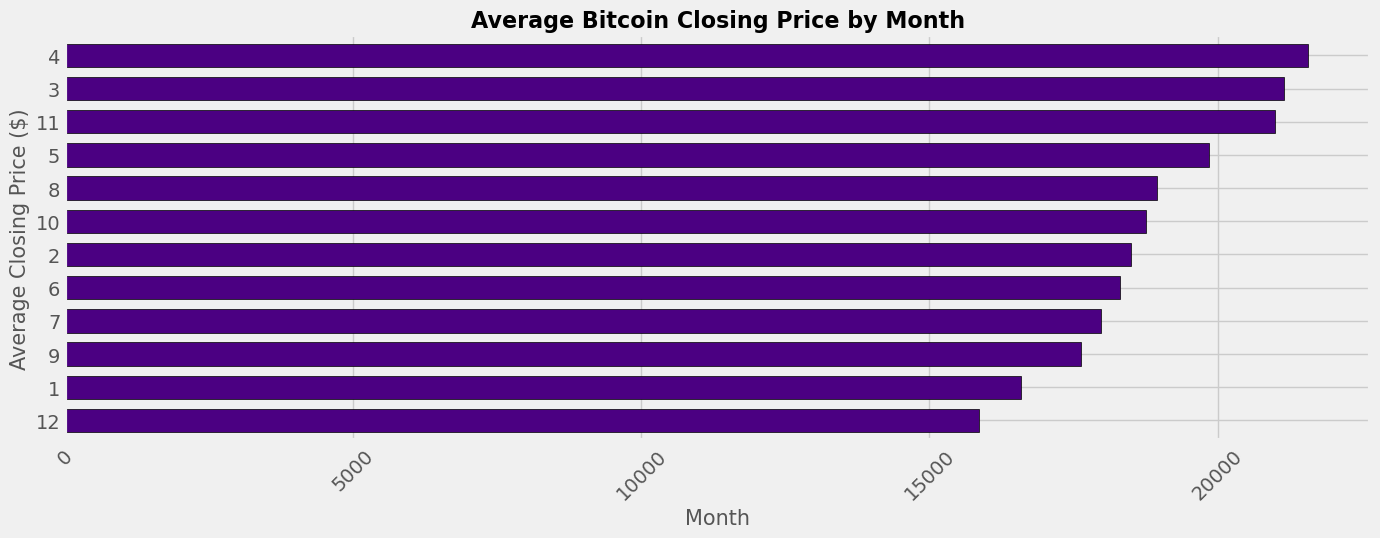

In [136]:
# Average Bitcoin Closing Price by Month
plt.figure(figsize=(15, 5))
Monthly_avg = df.groupby('Month')['Close'].mean().sort_values()

ax = Monthly_avg.plot(kind='barh', color='indigo', width=0.7,edgecolor='black')
ax.set_title('Average Bitcoin Closing Price by Month', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Average Closing Price ($)', fontsize=15)

plt.xticks(rotation= 45)
plt.show()

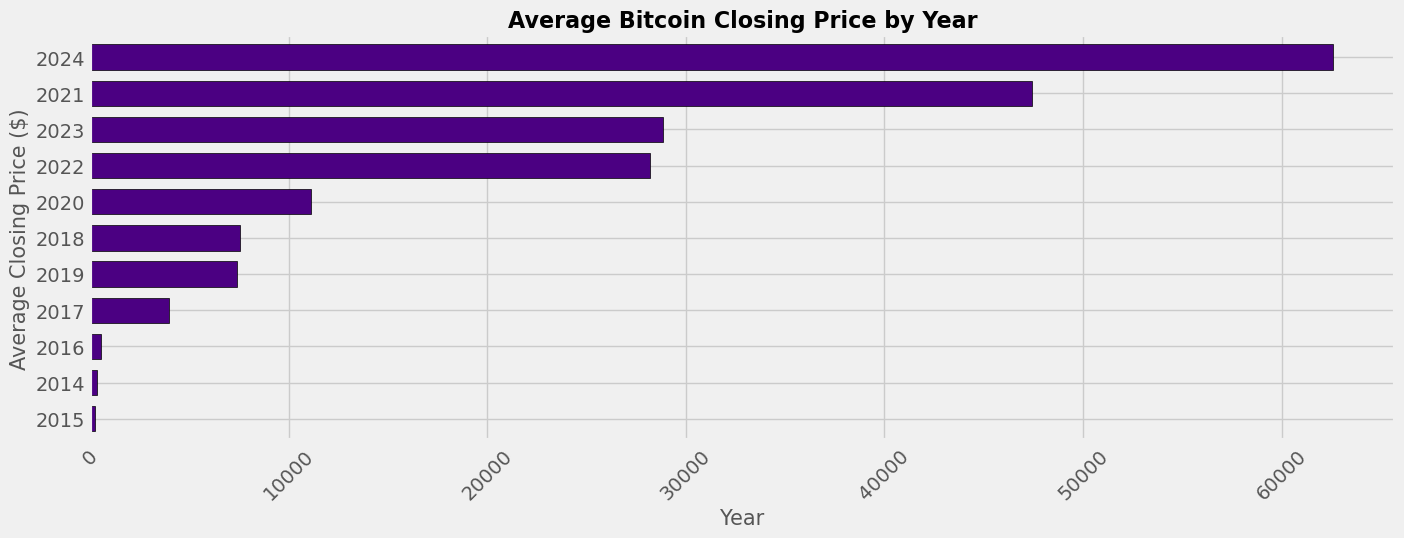

In [137]:
# Average Bitcoin Closing Price by Yea
plt.figure(figsize=(15, 5))
Yearly_avg = df.groupby('Year')['Close'].mean().sort_values()

ax = Yearly_avg.plot(kind='barh', color='indigo', width=0.7,edgecolor='black')
ax.set_title('Average Bitcoin Closing Price by Year', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Average Closing Price ($)', fontsize=15)

plt.xticks(rotation=45)
plt.show()

In [138]:
# Dropping Irrelevant Columns
df = df.drop(['Date', 'Adj Close','Month', 'Year'], axis=1)

In [139]:
# Standardizing the Dataset 
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),
                  columns=df.columns)
print(df)

         Close      High       Low      Open    Volume   Dollars  Price Range
0    -0.881202 -0.881579 -0.880487 -0.880959 -0.917584 -0.582576    -0.675674
1    -0.882778 -0.882110 -0.882417 -0.881391 -0.916904 -0.582571    -0.653537
2    -0.884199 -0.883472 -0.883821 -0.882963 -0.916730 -0.582570    -0.653895
3    -0.883523 -0.883685 -0.883558 -0.884375 -0.916784 -0.582571    -0.661713
4    -0.884006 -0.884196 -0.883396 -0.883731 -0.917304 -0.582575    -0.672913
...        ...       ...       ...       ...       ...       ...          ...
3719  3.840255  3.773588  3.871861  3.822939  3.053502  6.789532     1.235046
3720  3.781782  3.743512  3.872363  3.847426  1.329517  3.576537     0.720390
3721  3.793115  3.726264  3.801409  3.788470  1.698894  4.215166     1.572012
3722  3.557785  3.739774  3.646951  3.800723  3.176801  6.813740     4.285833
3723  3.504266  3.554704  3.555013  3.563386  3.720792  7.541842     2.648552

[3724 rows x 7 columns]


In [140]:
# Splitting Dataset into Features and Target
X = df[['High', 'Low', 'Open', 'Volume', 'Dollars', 'Price Range']]
y = df['Close']

In [141]:
# Splitting Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2793, 6)
(2793,)
(931, 6)
(931,)


In [142]:
# Linear Regression Model
model = LinearRegression()

In [143]:
model.fit(X_train, y_train) #Training the Linear Regression Model"

LinearRegression()

In [144]:
# Predictions and Calculating Mean Absolute Error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.008136071795783394
